Problem Statement: Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

Importing the libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Data Collection and Analysis

In [47]:
#loading dataset from csv file using pandas
Sales_data = pd.read_csv('/content/advertising.csv')

In [48]:
Sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [49]:
Sales_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [50]:
Sales_data.shape

(200, 4)

In [51]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [52]:
#checking null values
Sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data Analysis

In [53]:
Sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<ipython-input-54-c03f3c26adbd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sales_data['Sales'])


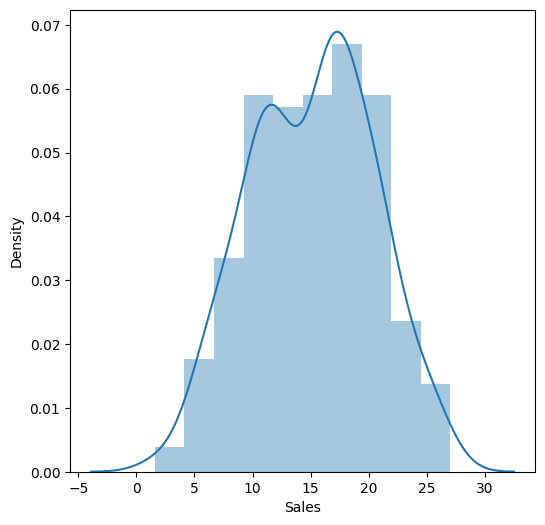

In [54]:
# Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(Sales_data['Sales'])
plt.show()

<ipython-input-55-122e3bf2f92b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sales_data['TV'])


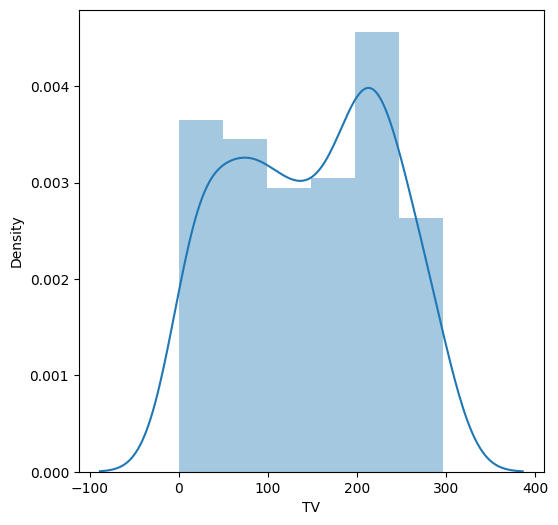

In [55]:
# TV_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(Sales_data['TV'])
plt.show()

<ipython-input-56-9265b78b2dd1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sales_data['Radio'])


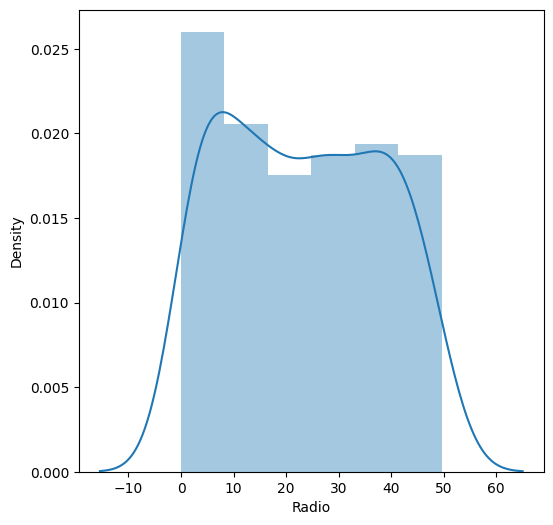

In [56]:
# Radio_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(Sales_data['Radio'])
plt.show()

<ipython-input-57-54b284210436>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sales_data['Newspaper'])


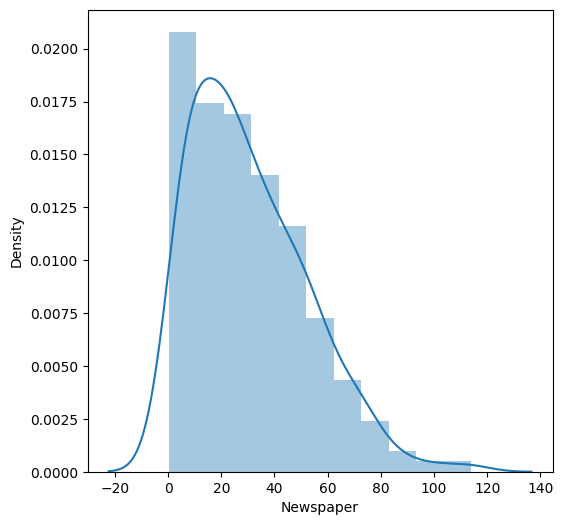

In [57]:
# Newspaper_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(Sales_data['Newspaper'])
plt.show()

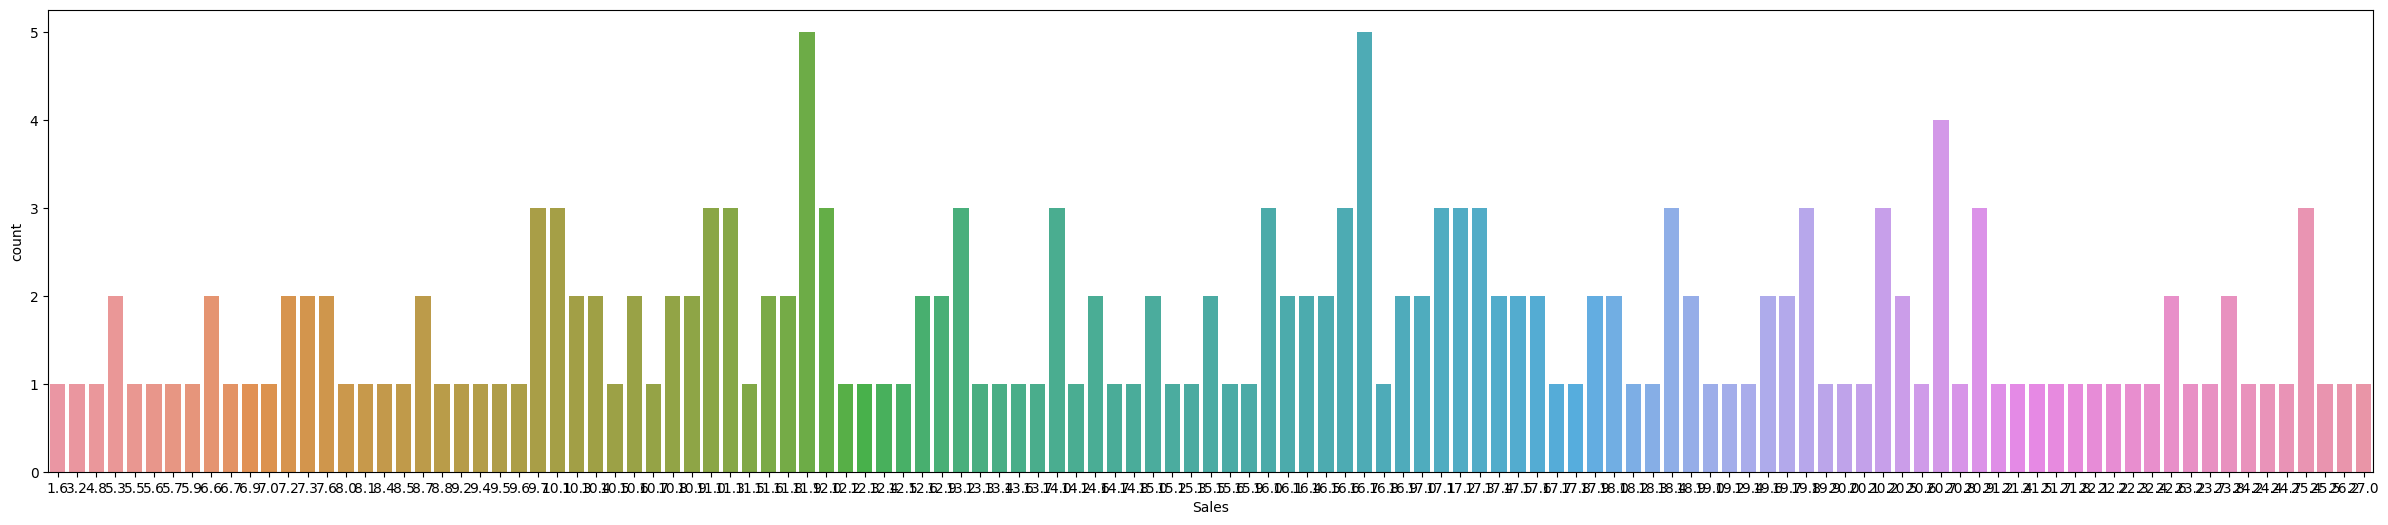

In [58]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Sales', data=Sales_data)
plt.show()

Separating features and target data

In [59]:
# Extract the features and target
features = Sales_data[['TV', 'Radio', 'Newspaper']]
target = Sales_data['Sales']

In [60]:
print(features)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [61]:
print(target)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [62]:
target.shape

(200,)

In [63]:
features.shape

(200, 3)

In [64]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [65]:
print(X_train.shape,X_test.shape)

(160, 3) (40, 3)


In [66]:
print(y_train.shape,y_test.shape)

(160,) (40,)


In [67]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [69]:
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 4.322961810973305


In [70]:
# Print the predicted sales for a product with the following features:
# TV = 100
# Radio = 200
# Newspaper = 150
features_new = np.array([[100, 200, 150]])
sales_pred = model.predict(features_new)
print('Predicted sales:', sales_pred)

Predicted sales: [33.44494575]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


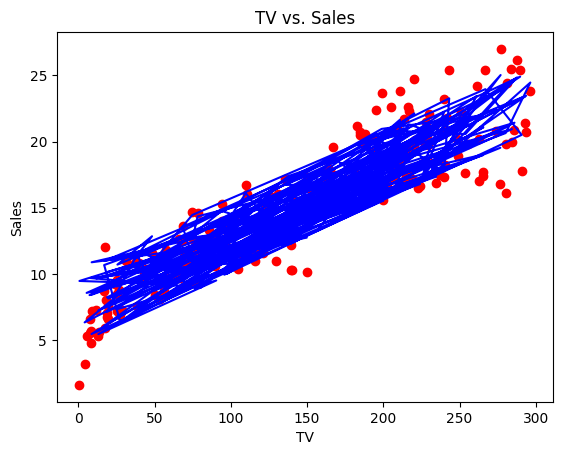

In [71]:
# Visualize the data
plt.figure()
plt.scatter(Sales_data['TV'], Sales_data['Sales'], color='red')
plt.plot(Sales_data['TV'], model.predict(features), color='blue')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs. Sales')
plt.show()

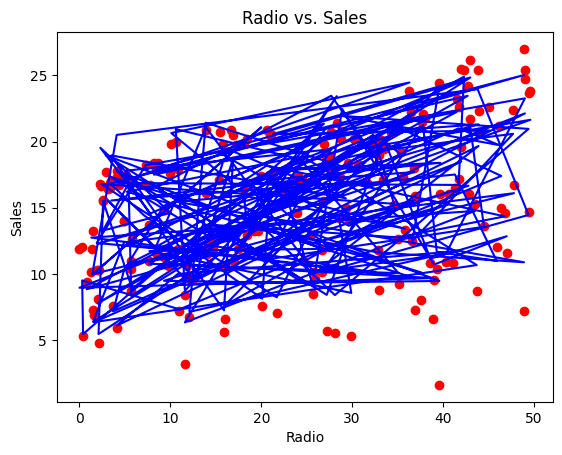

In [73]:
plt.figure()
plt.scatter(Sales_data['Radio'], Sales_data['Sales'], color='red')
plt.plot(Sales_data['Radio'], model.predict(features), color='blue')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs. Sales')
plt.show()

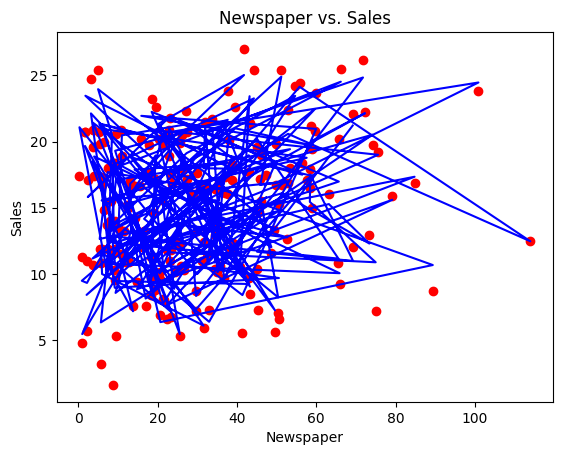

In [74]:
plt.figure()
plt.scatter(Sales_data['Newspaper'], Sales_data['Sales'], color='red')
plt.plot(Sales_data['Newspaper'], model.predict(features), color='blue')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs. Sales')
plt.show()

# New Section